In [2]:
# import BeautifulSoup library
from bs4 import BeautifulSoup   # Enough for HTML
import requests    # Enough for HTML
from selenium import webdriver    # Selenium is specifically for JS website
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import re
import pandas as pd
import numpy as np
sns.set(color_codes=True) #overide maplot libs ugly colours.
mpl.rcParams['figure.figsize'] = [22, 14] #default figure size

In [ ]:
from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
import numpy as np
import re
import pandas as pd
import requests
driver = webdriver.Chrome(executable_path='/Applications/chromedriver')
df1=pd.DataFrame()

def getdetails(x,indus):
    driver.execute_script("window.open('');")
    for job in x.find_all('a',{'class':'title'}):
        global df1
        driver.switch_to.window(driver.window_handles[1])
        INNERURL = 'https://www.recruit.com.hk'+job['href']
        driver.get(INNERURL)
        innerhtml = driver.page_source
        inner = BeautifulSoup(innerhtml, "html.parser")
        print(INNERURL)
        
        title = inner.find(id='jobDetail_jobTitleLab').text if inner.find(id='jobDetail_jobTitleLab') else np.nan
        postdate = inner.find(id='jobDetail_postDateLabel').text if inner.find(id='jobDetail_postDateLabel') else np.nan
        company = inner.find(id='jobDetail_companyNameLabel').text if inner.find(id='jobDetail_companyNameLabel') else np.nan
        poslevel = inner.find(id='jobDetail_jobPosLvlLabel').text if inner.find(id='jobDetail_jobPosLvlLabel') else np.nan
        industrylabel = inner.find(id='jobDetail_jobIndustryLabel').text if inner.find(id='jobDetail_jobIndustryLabel') else np.nan
        education = inner.find(id='jobDetail_eduLevelLabel').text if inner.find(id='jobDetail_eduLevelLabel') else np.nan
        workexp = inner.find(id='jobDetail_workExpLabel').text if inner.find(id='jobDetail_workExpLabel') else np.nan
        salary = inner.find(id='jobDetail_salaryLabel').text if inner.find(id='jobDetail_salaryLabel') else np.nan
        location = inner.find(id='jobDetail_locationLabel').text if inner.find(id='jobDetail_locationLabel') else np.nan
        jobfunction = [i.text for i in inner.find_all(id=re.compile("^jobDetail_jobCatFunc\d+Link"))] \
        if inner.find_all(id=re.compile("^jobDetail_jobCatFunc\d+Link")) else np.nan
        benefits = [i.text for i in inner.find_all(id=re.compile("^jobDetail_benefitsLV_ctrl\d+"))] \
        if inner.find_all(id=re.compile("^jobDetail_benefitsLV_ctrl\d+")) else np.nan
        wideindustry = indus

        df1 = df1.append({"Job_title":title, "Posting_date":postdate, "Company":company,"Level":poslevel, "Industry_label":industrylabel,"Education":education,\
                  "Work_exp":workexp,"Salary":salary,"Location":location,"Job_function":jobfunction,"Benefits":benefits,"Industry":wideindustry},ignore_index=True) 
 
 #start of code
# for i, v in jobcatdf[(jobcatdf['CatNo']==26000)|(jobcatdf['CatNo']==13000)|(jobcatdf['CatNo']==19000)|(jobcatdf['CatNo']==53460)|(jobcatdf['CatNo']==41000)|(jobcatdf['CatNo']==20000)].iterrows():
for i, v in jobcatdf[(jobcatdf['CatNo']==41000)].iterrows():

    URL = "https://www.recruit.com.hk/jobseeker/JobSearchResult.aspx?searchPath=C&jobCat="+str(v.CatNo)
    driver.get(URL)
    subhtml = driver.page_source
    soup = BeautifulSoup(subhtml, "html.parser")

    try:
        while (soup.find('a',{'class':"next-page PageNumber"})['href']):
            # driver.get(URL)
            getdetails(soup,v.JobCat)
            driver.close()
            driver.switch_to.window(driver.window_handles[0])
            driver.execute_script("__doPostBack('pagerBottom$ctl02$ctl00','')")
            # driver.findElement(By.class("next-page PageNumber")).click()
            WebDriverWait(driver, 30)
            newphtml = driver.page_source
            soup = BeautifulSoup(newphtml, "html.parser")
    except:
        print('pass',URL)
        continue

In [ ]:
df.to_csv('data/recruithk.csv',mode = 'a', header = False,index = False)

In [3]:
##### CTGoodJobs csv ######

In [4]:
# Getting the CTGoodJobs data from csv
dfct = pd.read_csv('data/ctjobs.csv')
dfct.shape

(13546, 13)

In [5]:
import ftfy

In [6]:
# Fixing UTF-8 problem
from ftfy import fix_encoding
dfct['Job_title'] = dfct['Job_title'].apply(lambda x: fix_encoding(x))
dfct['Company'] = dfct['Company'].apply(lambda x: fix_encoding(str(x)))

In [7]:
# First 5 rows of CTGoodJobs DF
dfct.head()

,Unnamed: 0,Benefits,Company,Education,Industry,Industry_label,Job_function,Job_title,Level,Location,Posting_date,Salary,Work_exp
0,0,\n\n5-day week\nEducation subsidies\nFlexible ...,China Life Insurance (Overseas) Company Limited,\n\nDiploma or equivalent\nAsso. Deg or High D...,Banking / Finance,\n\nInsuranceFinancial Services\n\n,\n\nBanking / Finance - Client Service\nInsura...,助理業務經理/準區域總監,\n\nNon-management level\n,\n\nWanchai\n\n,Posted on 2020-09-09,\n\n N/A ( Search your salary info in )\n\n,\n\n0 year - 5 years\n\n
1,1,NaN,Citi,\n\nDegree\n\n,Banking / Finance,\n\nBanking\n\n,\n\nBanking / Finance - Client Service\nBankin...,Citigold Relationship Manager,\n\nNon-management level\n,NaN,Posted on 2020-09-07,\n\n N/A ( Search your salary info in )\n\n,\n\n2 years - 7 years\n\n
2,2,\n\n5-day week\nEducation subsidies\nFlexible ...,NLT Company,\n\nF.5- F.7 or DSE\nAsso. Deg or High Dip\nDe...,Banking / Finance,\n\nBankingFinancial ServicesProperty Manageme...,\n\nAccounting / Auditing - Corporate Finance\...,Wealth Management Trainee(歡迎本地畢業生及IANG),\n\nEntry level\n,\n\nWanchai\n\n,Posted on 2020-09-11,"\n\n 14,000 - 25,000 / month \n\n",\n\n0 year - 2 years\n\n
3,3,\n\n5-day week\nEducation subsidies\nFlexible ...,China Life Insurance (Overseas) Company Limited,\n\nDiploma or equivalent\nAsso. Deg or High D...,Banking / Finance,\n\nInsuranceFinancial Services\n\n,\n\nBanking / Finance - Client Service\nInsura...,助理業務經理/準區域總監,\n\nNon-management level\n,\n\nWanchai\n\n,Posted on 2020-09-11,\n\n N/A ( Search your salary info in )\n\n,\n\n0 year - 5 years\n\n
4,4,NaN,RecruitFirst Limited,\n\nDiploma or equivalent\nAsso. Deg or High D...,Banking / Finance,\n\nAccounting / Audit / Tax ServicesBankingFi...,\n\nBanking / Finance - Analyst\nBanking / Fin...,Operation Manager (Asset Management),\n\nMiddle management level\n,\n\nCentral\n\n,Posted on 2020-09-11,"\n\n 35,000 - 45,000 / month \n\n",\n\n5 years - 8 years\n\n


In [8]:
# Removal of the unnamed column: 0
dfct.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
# Drop duplicate rows with same job post
dfct = dfct.drop_duplicates(keep='first')
dfct.shape

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/Users/mankan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 834, in run
  File "</Users/mankan/opt/anaconda3/lib/python3.7/site-packages/decorator.py:decorator-gen-23>", line 2, in writeout_cache
  File "/Users/mankan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 58, in needs_sqlite
  File "/Users/mankan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 780, in writeout_cache
  File "/Users/mankan/opt/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 764, in _writeout_input_cache
sqlite3.OperationalError: unable to open database file

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/mankan/opt/anaconda3/lib/python3.7/site-packages/ipykernel/iostream.py", line 97, in _event_pipe
AttributeError: '_thread._local' object has no attribute

(13456, 12)

In [10]:
# Assign data source from CTGoodjobs before merging the data
dfct['Source'] = "CTGoodjobs"

In [11]:
# Standardize the Industry name for further analysis and merging two df
dfct['Industry'] = dfct['Industry'].replace('Marketing / Public Relations',"Marketing")
dfct['Industry'] = dfct['Industry'].replace('Engineering',"Engineering")
dfct['Industry'] = dfct['Industry'].replace('Information Technology',"IT")
dfct['Industry'] = dfct['Industry'].replace('Education',"Education")
dfct['Industry'] = dfct['Industry'].replace('Banking / Finance',"Banking / Finance")
dfct['Industry'] = dfct['Industry'].replace('Hotel / Catering / Club',"Hospitality")

In [12]:
# Clean Posting Date data
dfct['Posting_date'] = dfct['Posting_date'].str.replace('Posted on ','')

In [13]:
# Convert posting date to datetime format
dfct['Posting_date'] = pd.to_datetime(dfct['Posting_date'])

In [14]:
# Select the date range we want to focus
dfct = dfct[(dfct['Posting_date']>='2020-08-10') & (dfct['Posting_date']<='2020-09-05')]

In [15]:
# Clean Level data and re-categorize 
dfct['Level'] = dfct['Level'].str.strip("\n\n")
dfct['Level'] = dfct['Level'].apply(lambda x : "Entry" if x == "Non-management level"\
                                else"Entry" if x == "N/A" else "Entry" if x == \
                                "Entry level" else 'Entry' if x == "General" else "Middle"\
                                if x == "Middle management level" else "Senior" if x\
                                == "Senior management level"else "Senior" if x == 'Top' else x)

In [16]:
# Clean Industry_label data and make it to a list
dfct['Industry_label'] = dfct.Industry_label.str.strip("\n\n").str.replace(r"(?<=[A-Za-z])(?=[A-Z][a-z])",r"$",regex=True)
dfct['Industry_label'] = dfct['Industry_label'].str.split('$')

In [17]:
# Clean Job_function data for identifying IT vs non-IT skilled roles
dfct['Job_function'] = dfct['Job_function'].str.strip("\n\n")

In [18]:
# Clean Location data 
dfct['Location'] = dfct['Location'].str.strip("\n\n")

In [19]:
# Clean Education data
dfct['Education'] = dfct['Education'].str.strip("\n\n")

In [20]:
# Clean Benefits data and convert it to a list of benefits to analyze on correlation between jobs and no. of benefits
dfct['Benefits'] = dfct.Benefits.str.strip('\n\n').str.split('\n')

In [21]:
# Create a new column of Benefits_count to quantify it
dfct['Benefits_count'] = dfct['Benefits'].str.len()

In [22]:
# Clean Salary data and change them to float64, split it to Min_salary & Max_salary columns for further analysis
dfct['Min_salary'] = dfct['Salary'].str.replace(',','').str.extract(r'\D(\d+\d+).').astype(float)
dfct['Max_salary'] = dfct['Salary'].str.replace(',','').str.extract(r'\-\s(\d+\d+)').astype(float)

In [23]:
# Salary data in hours to approx. monthly pay case
dfct['Min_salary'] = dfct['Min_salary'].apply(lambda x: x*8*20 if x < 500 else x)
dfct['Max_salary'] = dfct['Max_salary'].apply(lambda x: x*8*20 if x < 500 else x)

In [24]:
# Clean Work Exp data and change them to float64, split it to Min_workexp & Max_workexp columns for further analysis
dfct['Min_workexp'] = dfct['Work_exp'].str.replace(',','').str.extract(r'\n\n(\d+)').astype(float)
dfct['Max_workexp'] = dfct['Work_exp'].str.replace(',','').str.extract(r'\-\s(\d+)').astype(float)

In [25]:
# Create IT_Specialization column to assign True & False to count no. of jobs grouped under IT in each sector
dfct['IT_Specialization'] = dfct['Job_function'].str.contains('Information Technology',regex=False)

In [26]:
# Analysis 3: Industry Overview
# 3.3: Top 10 most popular job titles per sector
# Cleaning job title data by regex and str.replace

In [27]:
##### RecriitHK csv ######

In [28]:
# Getting the RecruitHK data from csv
dfre = pd.read_csv('data/recruithk.csv')
dfre.shape

(5295, 12)

In [29]:
# First 5 rows of RecruitHK DF
dfre.head()

,Benefits,Company,Education,Industry,Industry_label,Job_function,Job_title,Level,Location,Posting_date,Salary,Work_exp
0,NaN,SIRIUS Partners Limited,Bachelor,All Banking / Finance / Securities,Banking / Finance / Securities / Investments,"['IT (Network & System)', 'IT (Systems / Techn...",UAT Tester- Top Financial Institution,Middle,NaN,Posting Date: 2020-09-10,--,2-5
1,"['', 'Bank Holiday', '', 'Commission', '', 'Fi...",AIA International Limited,Bachelor,All Banking / Finance / Securities,Insurance,['Banking / Finance / Securities (Financial Se...,Wealth Management Manager財富管理經理精英招募（年薪可達80萬或以上...,General,Eastern District / North Point,Posting Date: 2020-09-10,--,--
2,"['', 'Alternative Retirement Scheme', '', 'Bir...",Sun Life Hong Kong Limited,DSE,All Banking / Finance / Securities,Insurance,"['Insurance (Insurance / Broker)', 'Fresh Grad...",Executive Business Manager / Management Trainee,General,Kowloon City District / Whampoa,Posting Date: 2020-09-10,"$20,000 - $50,000",2-10
3,"['', 'Five-Day Work', '', 'Medical Insurance',...",I-Access Group Limited,Bachelor,All Banking / Finance / Securities,Banking / Finance / Securities / Investments,"['IT (Software / Web Developer)', 'Banking / F...",Programmer / Junior Programmer,General,Wanchai District / Causeway Bay,Posting Date: 2020-09-10,--,1
4,"['', 'Five-Day Work']",Vegasoul Capital Management (Asia) Limited,Bachelor,All Banking / Finance / Securities,Trading,"['Banking / Finance / Securities (Analysis)', ...",Quantitative Researcher - attractive salary!,General,NaN,Posting Date: 2020-09-10,--,3


In [30]:
# Drop duplicate rows with same job post
dfre = dfre.drop_duplicates(keep='first')
dfre.shape

(4963, 12)

In [31]:
# Assign data source from RecruitHK before merging the data
dfre['Source'] = "Recruithk"

In [32]:
# Standardize the Industry name for further analysis and merging two df
dfre['Industry'] = dfre['Industry'].replace('All Marketing / Public Relations',"Marketing")
dfre['Industry'] = dfre['Industry'].replace('All Engineering',"Engineering")
dfre['Industry'] = dfre['Industry'].replace('All IT',"IT")
dfre['Industry'] = dfre['Industry'].replace('All Education',"Education")
dfre['Industry'] = dfre['Industry'].replace('All Banking / Finance / Securities',"Banking / Finance")
dfre['Industry'] = dfre['Industry'].replace('All Hospitality / Hotel',"Hospitality")

In [33]:
# Clean Posting Date data
dfre['Posting_date'] = dfre['Posting_date'].str.replace('Posting Date: ','')

In [34]:
# Convert posting date to datetime format
dfre['Posting_date'] = pd.to_datetime(dfre['Posting_date'])

In [35]:
# Select the date range we want to focus
dfre = dfre[(dfre['Posting_date']>='2020-08-10') & (dfre['Posting_date']<='2020-09-05')]

In [36]:
# Clean Level data and re-categorize 
dfre['Level'] = dfre['Level'].str.strip("\n\n")
dfre['Level'] = dfre['Level'].apply(lambda x : "Entry" if x == "General"\
                                else "Middle" if x == "Middle" else "Senior" if x\
                                == "Senior"else "Senior" if x == 'Top' else x)

In [37]:
# No need to clean Industry_label, Job_function, Location, Education

In [38]:
# Clean Benefits data and convert it to a list of benefits to analyze on correlation between jobs and no. of benefits
dfre['Benefits'] = dfre.Benefits.str.replace("''," ,"")
dfre['Benefits'] = dfre.Benefits.str.strip("[]")
dfre['Benefits'] = dfre.Benefits.str.replace("  ","")
dfre['Benefits'] = dfre['Benefits'].str.split(",")

In [39]:
# Create a new column of Benefits_count to quantify it
dfre['Benefits_count'] = dfre['Benefits'].str.len()

In [40]:
# Clean Salary data and change them to float64, split it to Min_salary & Max_salary columns for further analysis
dfre['Min_salary'] = dfre['Salary'].str.replace(',','').str.extract(r'\D(\d+\d+).').astype(float)
dfre['Max_salary'] = dfre['Salary'].str.replace(',','').str.extract(r'\-\s(\d+\d+)').astype(float)

In [41]:
# Salary data in hours to approx. monthly pay case
dfre['Min_salary'] = dfre['Min_salary'].apply(lambda x: x*8*20 if x < 500 else x)
dfre['Max_salary'] = dfre['Max_salary'].apply(lambda x: x*8*20 if x < 500 else x)

In [42]:
# Clean Work Exp data and change them to float64, split it to Min_workexp & Max_workexp columns for further analysis
dfre['Min_workexp'] = dfre['Work_exp'].str.replace(',','').str.extract(r'^(\d+)\-*').astype(float)
dfre['Max_workexp'] = dfre['Work_exp'].str.replace(',','').str.extract(r'\-\s*(\d+)$').astype(float)

In [43]:
# Create IT_Specialization column to assign True & False to count no. of jobs grouped under IT in each sector
dfre['IT_Specialization'] = dfre['Job_function'].str.contains('IT',regex=False)

In [44]:
# Analysis 3: Industry Overview
# 3.3: Top 10 most popular job titles per sector
# Cleaning job title data by regex and str.replace


In [45]:
#### Merging two dfs into one single df ####

In [46]:
newdf = pd.concat([dfre, dfct])

In [47]:
#Replace CL Limited
newdf['Company'] = newdf['Company'].replace('CL Technical Services Ltd',"CL Technical Services Limited")
# Remove duplicat job title + company from two dfs
newdf['companyjob'] = newdf['Company'].map(str) + newdf['Job_title'].map(str) 
nodupdf = newdf.drop_duplicates(subset=['companyjob','Industry','Level'], keep='first')
# nodupdf.to_csv("nodupdf.csv")

In [48]:
newdf['week'] = newdf['Posting_date'].dt.strftime('%W')
weekdf = newdf.drop_duplicates(subset=['companyjob','Industry','Level','week'], keep='first')
weekdf.shape

(12902, 21)

In [66]:
nodupdf.Industry.unique()

array(['Banking / Finance', 'Education', 'Engineering', 'Hospitality',
       'IT', 'Marketing'], dtype=object)

In [49]:
nodupdf.groupby('Industry')['IT_Specialization'].value_counts()

Industry           IT_Specialization
Banking / Finance  False                1710
                   True                  168
Education          False                 692
                   True                   18
Engineering        False                1664
                   True                  240
Hospitality        False                 821
                   True                    7
IT                 True                 2837
Marketing          False                1123
                   True                   95
Name: IT_Specialization, dtype: int64

In [62]:
nodupdf.shape

(9375, 20)

In [51]:
#### Analysis & Plotting ####

In [52]:
# Analysis 1: Total number of job post comparison among industry
#for ploting stack
indcountdf = nodupdf.groupby(['Industry'])['Job_title'].count()
indcountdf = indcountdf.reset_index()
indcountdf.columns=['Industry','total_job_opening']
indcountdf['Period']='4weeks'
pivot_df = indcountdf.pivot(index='Period', columns='Industry', values='total_job_opening')

#for data graph
indcountdf['%']=indcountdf['total_job_opening'].apply(lambda x:round(x/indcountdf['total_job_opening'].sum()*100,2))
indcountdf[['Industry','total_job_opening','%']].sort_values('%',ascending=False).transpose().to_csv('data/total_industry.csv',index='False')
indcountdf[['Industry','total_job_opening','%']].sort_values('%',ascending=False).transpose()



,4,2,0,5,3,1
Industry,IT,Engineering,Banking / Finance,Marketing,Hospitality,Education
total_job_opening,2837,1904,1878,1218,828,710
%,30.26,20.31,20.03,12.99,8.83,7.57


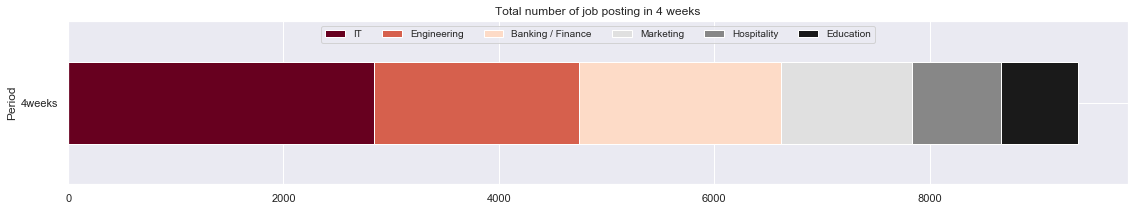

In [53]:
# newdf.groupby(['Industry'])['Job_title'].count().transpose()
orderli = list(nodupdf['Industry'].value_counts().index)
gph = pivot_df.loc[:,orderli].plot(kind='barh',stacked=True,figsize=(19,3), cmap="RdGy",title='Total number of job posting in 4 weeks')
plt.legend(loc='upper center',fontsize='small', ncol = 6)
xticks = range(0, 10000, 1000)

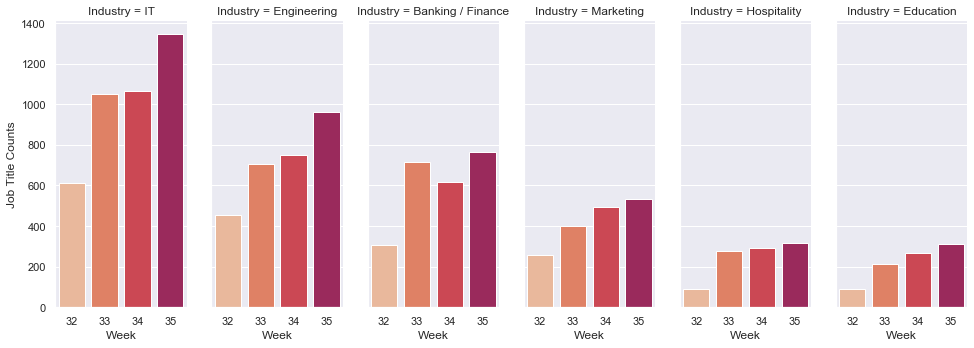

In [54]:
# Analysis 2: Week on Week Job Counts
#usinf newdf instead of nodup df to get active job posting at that time


ax = sns.catplot(x="week", col="Industry", 
                data=weekdf, kind="count",
                aspect=.45, palette=sns.color_palette("rocket_r"),
                col_order = newdf['Industry'].value_counts().index)
ax.set_axis_labels("Week", "Job Title Counts")
plt.show(ax)

In [55]:
# Analysis 3: Industry Overview
# 3.1: Getting top 5 companies with most job posts per sector
nodupdf.groupby('Industry')['Company'].value_counts().groupby(level=[0]).head(5).to_frame()

# # Plotting graphs
# x1 = x.reset_index(name='count')
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['SimHei']
# mpl.rcParams['font.serif'] = ['SimHei']
# import seaborn as sns
# sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})
# sns.barplot(data=x1, x='count', y="Industry")


Company
Industry          Company                                                    
Banking / Finance Morgan McKinley                                          59
                  Bank of China (Hong Kong) Limited                        49
                  RecruitFirst Limited                                     49
                  Bank of Communications Co., Ltd. Hong Kong Branch        44
                  JPMorgan Chase Bank, N.A.                                44
Education         小豆苗教育中心                                                  36
                  The Education University of Hong Kong                    34
                  童行社                                                      18
                  Creative Thinking Associaton                             17
                  勵致研習中心                                                   10
Engineering       Hong Kong Applied Science and Technology Resear...       49
                  Build King Holdings Ltd                                  40
                  Black & Veatch                                           37
                  PCCW Solutions Ltd                                       34
                  Hip Hing Construction Co Ltd                             30
Hospitality       亞洲國際餐飲集團有限公司 Taste of Asia Group Limited                 38
                  Sheraton & Four Points by Sheraton Hong Kong Tu...       26
                  Rosewood Hong Kong                                       11
                  Harbour Grand (H.K.) Resources Limited                   10
                  Hyatt Centric Victoria Harbour Hong Kong                 10
IT                CL Technical Services Limited                           166
                  PCCW Solutions Ltd                                       87
                  RecruitFirst Limited                                     49
                  PeopleLink Services Limited                              44
                  Hong Kong Applied Science and Technology Resear...       43
Marketing         Michael Page                                             17
                  Ambitious People                                         13
                  RecruitFirst Limited                                     12
                  YesStyle.com Ltd                                         12
                  AIA International Limited                                10

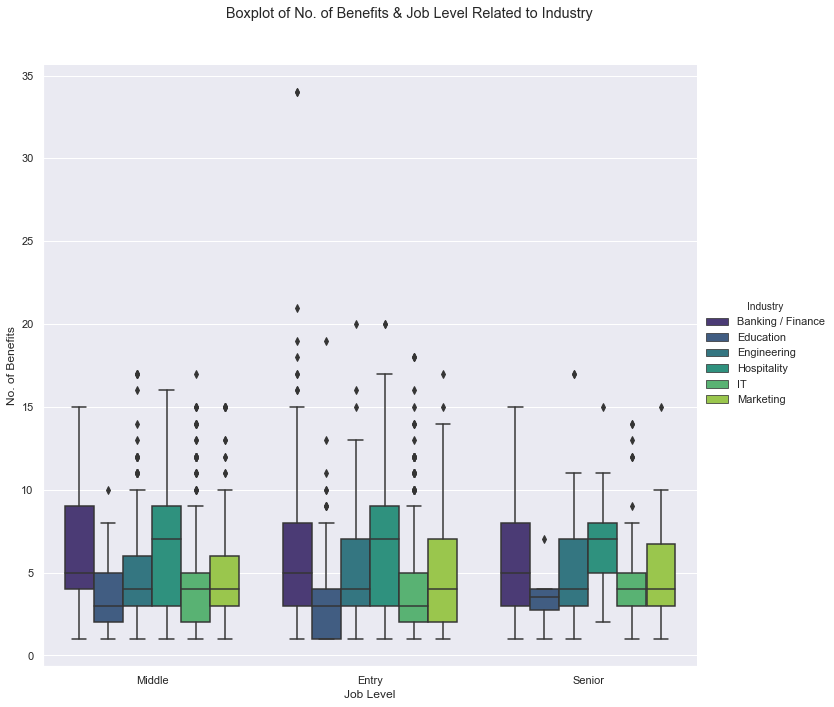

In [56]:
# Analysis 3: Industry Overview
# 3.2: Difference in benefit counts across levels and across industries
# Could vary by poster, however IT industry appears to receive average/lower average in benefit counts
# Hospitality > Banking/Finance > Engineering > Marketing = IT > Education
# Might be a correlation between the pseudo-demand and overall package
p = sns.catplot(x="Level", y="Benefits_count", hue="Industry",
            palette="viridis",
            kind="box", data=nodupdf, height=10)
p.fig.suptitle("Boxplot of No. of Benefits & Job Level Related to Industry")
plt.subplots_adjust(top=0.9)
plt.xlabel("Job Level")
plt.ylabel("No. of Benefits")
plt.show()

In [57]:
# Analysis 3: Industry Overview
# 3.3: Top 10 most popular job titles per sector
# Cleaning job title data by regex and str.replace


# Top 10 most popular jobs
# Engineering - Not many insights
top10engineering = nodupdf.query('Industry == "Engineering"').groupby('Job_title').count().sort_values\
('IT_Specialization',ascending=False)['IT_Specialization'].to_frame().head(10)

# Marketing - Some Digital Marketing and EComm roles
top10marketing = nodupdf.query('Industry == "Marketing"').groupby('Job_title').count().sort_values\
('IT_Specialization',ascending=False)['IT_Specialization'].to_frame().head(10)

# IT - Majority is still dominated by developer and software engineers, BA and more specialized ones rank bottom
top10IT = nodupdf.query('Industry == "IT"').groupby('Job_title').count().sort_values\
('IT_Specialization',ascending=False)['IT_Specialization'].to_frame().head(10)

# Banking/Finance - Specific IT track for FinTech/Banking environment
top10finance = nodupdf.query('Industry == "Banking / Finance"').groupby('Job_title').count().sort_values\
('IT_Specialization',ascending=False)['IT_Specialization'].to_frame().head(10)

# Education - Online Devleopment Specialist --> online learning platforms
top10education = nodupdf.query('Industry == "Education"').groupby('Job_title').count().sort_values\
('IT_Specialization',ascending=False)['IT_Specialization'].to_frame().head(10)

# Hospitality - Not many insights
top10hospitality = nodupdf.query('Industry == "Hospitality"').groupby('Job_title').count().sort_values\
('IT_Specialization',ascending=False)['IT_Specialization'].to_frame().head(10)


# Barplot of top 10 most popular jobs
# plot.bar(subplots=True)


IT_Specialization      False       True 
Industry                                
Banking / Finance  91.054313    8.945687
Education          97.464789    2.535211
Engineering        87.394958   12.605042
Hospitality        99.154589    0.845411
IT                       NaN  100.000000
Marketing          92.200328    7.799672


/Users/mankan/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/style.py:60: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [conv.to_rgba(c) for c in colors]


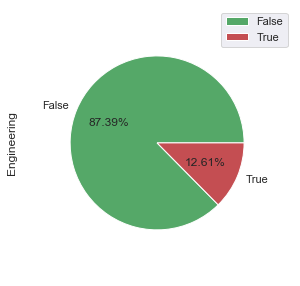

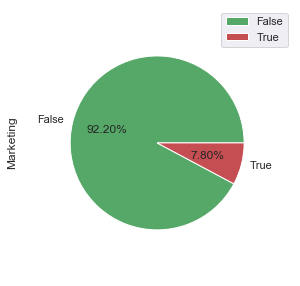

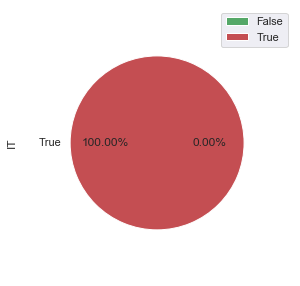

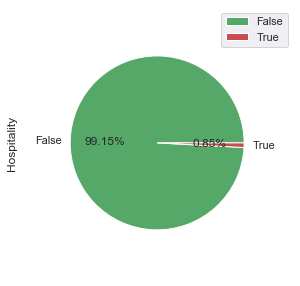

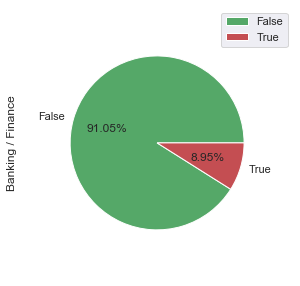

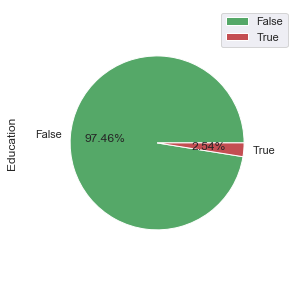

In [58]:
# Analysis 4: IT vs Non-IT specialization in each sector
# Calculate the proportion of jobs requiring IT skills
nodupdfitpercent = nodupdf.groupby('Industry')['IT_Specialization'].value_counts(normalize=True).unstack().apply(lambda x: x*100)
print(nodupdfitpercent)

# Pie chart of IT% of each sector
nodupdfitpercent.query('Industry=="Engineering"').T.plot.pie(y="Engineering",figsize=(14,5), colors="Greys",autopct='%1.2f%%',legend=True, radius=.8)
nodupdfitpercent.query('Industry=="Marketing"').T.plot.pie(y="Marketing",figsize=(14,5), colors="Greys",autopct='%1.2f%%',legend=True, radius=.8)
nodupdfitpercent.query('Industry=="IT"').T.plot.pie(y="IT",figsize=(14,5), colors="Greys",autopct='%1.2f%%',legend=True, radius=.8)
nodupdfitpercent.query('Industry=="Hospitality"').T.plot.pie(y="Hospitality",figsize=(14,5), colors="Greys",autopct='%1.2f%%',legend=True, radius=.8)
nodupdfitpercent.query('Industry=="Banking / Finance"').T.plot.pie(y="Banking / Finance",colors="Greys",figsize=(14,5), autopct='%1.2f%%',legend=True, radius=.8)
nodupdfitpercent.query('Industry=="Education"').T.plot.pie(y="Education",figsize=(14,5),colors="Greys", autopct='%1.2f%%',legend=True, radius=.8)


# Taking IT vs Non-IT Specification as the layer for further analysis on salary

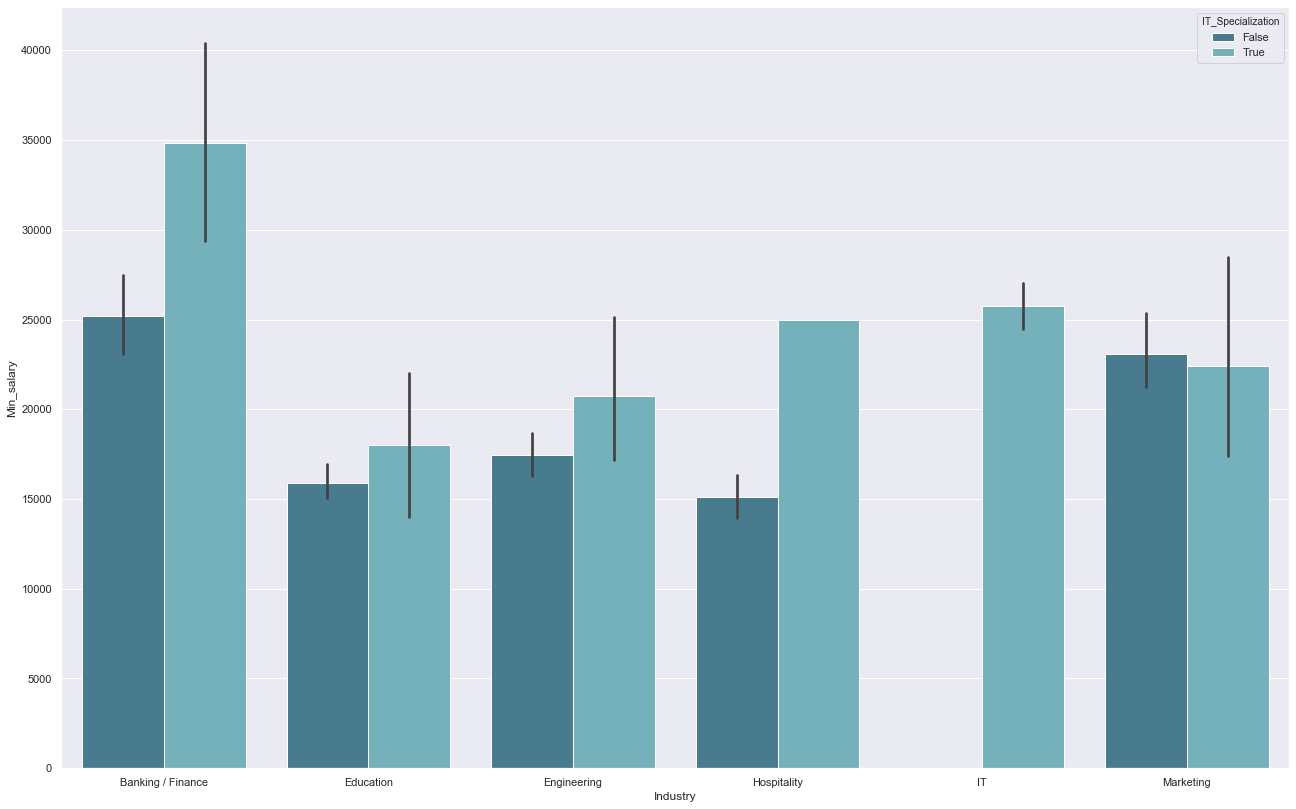

In [59]:
# Analysis 4: IT vs Non-IT specialization in each sector

# Barplot of IT% across all sectors - using IT specification to spot out any difference in min salary (Insignificant)
a = sns.barplot(data=nodupdf,x="Industry",y='Min_salary',hue='IT_Specialization',palette='GnBu_d')



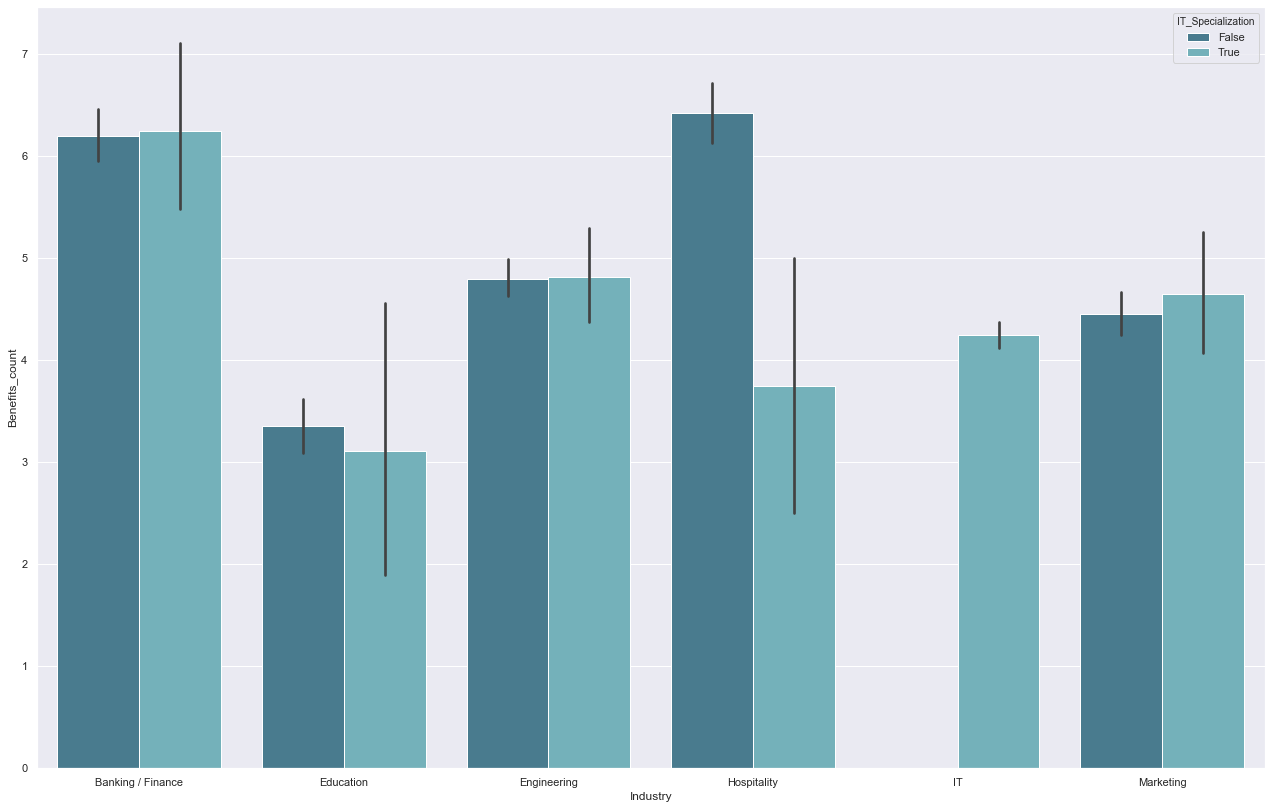

In [60]:
# Analysis 4: IT vs Non-IT specialization in each sector

# Barplot of IT% across all sectors - using IT specification to spot out any difference in Benefit counts
b = sns.barplot(data=nodupdf,x="Industry",y='Benefits_count',hue='IT_Specialization',palette='GnBu_d')


In [61]:
# Analysis 5: Salary

# 5.1 Salary Displot Distribution of Industry: Strong from IT and Banking/Finance
sns.displot(data=nodupdf, x="Min_salary", y="Max_salary",hue='Industry',kind='kde',height=10, 
    aspect=1.5).set(title='Salary Distribtion of Industry')
plt.xlabel("Min Salary (HK$)")
plt.ylabel("Max Salary (HK$)")
plt.show()

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
# 5.2 Salary Boxplot to show Salary Distribution of Level with IT vs Non-IT specialized roles: 
# IT shows all with higher means
h = sns.catplot(x="Level", y="Max_salary", hue="IT_Specialization", \
            kind="box", data=nodupdf, height=10, palette="viridis")
h.fig.suptitle("Boxplot of Max Salary & Level Related to IT Specialization")
plt.subplots_adjust(top=0.9)
plt.xlabel("Job Level")
plt.ylabel("Max Salary (HK$)")
plt.show()

In [ ]:
# 5.3 Salary Boxplot to show Salary Distribution among Industry with IT vs Non-IT specialized roles: 
# Some domains do not align with IT with higher pay, Finance/Banking is strong in this. 
# Could be biased by job platform itself
e = sns.catplot(x="Industry", y="Max_salary", hue="IT_Specialization", \
            kind="box", data=nodupdf, height=10, palette='viridis')
e.fig.suptitle("Boxplot of Max Salary & Industry Related to IT Specialization")
plt.subplots_adjust(top=0.9)
plt.xlabel("Industry")
plt.ylabel("Max Salary (HK$)")
plt.show()

In [ ]:
# 5.4 Jointplot to show willingness of companies to offer against jobs' level
# In general, all industries share similar density and peak in low exp years yet IT does have a higher pay amount
# where it peaks, with slightly lesser years of exp
# Some IT jobs are in outlier range where it appears to have higher pay compared to other professionals like Engineering
sns.set_theme(style="ticks")

o = sns.jointplot(data=nodupdf, x="Min_workexp", y="Max_salary",hue='Industry',kind='kde',height=10)
o.fig.suptitle("Relationship between Min Work Exp & Max Salary Related to Industry")
plt.subplots_adjust(top=0.9)
o.set_axis_labels("Min Work Exp (Year)", "Max Salary (HK$)")
plt.show()

In [ ]:
# 5.5 Regression plot to study the strength of correlation between years of exp and max salary
# This shows the pay rise potential and proportionality of pay in each sector. How much each industry values their talents.

# It shows the best available fit for the trend of the max salary usually companies give with respect to the 
# max years of exp that one possesses. And the data points that we see at extreme top right which are far away from 
# this line are known as outliers in the dataset.

# Finance industry are in general more generous in the beginning stage, while marketing and IT industry shows higher
# growth cap. 


r = sns.lmplot(x="Max_workexp", y="Max_salary", hue="Industry",data=nodupdf, height=8, aspect=1.5, palette="Set1")
r.fig.suptitle("Relationship between Max Work Exp & Max Salary Related to Industry")
plt.subplots_adjust(top=0.9)
plt.xlabel("Max Work Exp (Year)")
plt.ylabel("Max Salary (HK$)")
plt.show()

In [ ]:
# 5.6 Regression plots to study the advantage of IT specialized skills considering years of exp vs max salary
# This shows the pay rise potential and proportionality of pay in each sector if the job requires IT skills.

# Banking/Finance, Engineering and Marketing shows quite substantial results in valuing IT specficalized skills,
# with greater slope and starting salary point. 

g = sns.lmplot(x="Max_workexp", y="Max_salary", hue="IT_Specialization", col='Industry',\
           data=nodupdf, height=8, aspect=.5, palette="Set2",col_wrap=3)

g.fig.suptitle("Relationship of Max Work Experience & Max Salary Related to IT Specialization")
plt.subplots_adjust(top=0.9)
g.set_axis_labels("Max Work Exp (Year)", "Max Salary (HK$)")
plt.show()

In [ ]:
# 5.7 Displot to study the pay difference distribution of Data-related vs. Non-Data-related jobs in IT industry

# To create a new column "Data_or_NonData" to categorize IT jobs, carefulling picking related keywords in job title
nodupdf['Data_or_NonData'] = nodupdf.Job_title.str.contains('Data|data|Business Analyst|Machine Learning|AI|Computer Vision')
dfit = nodupdf.query('Industry=="IT"')

# Getting Max salary using describe()
print(dfit.groupby('Data_or_NonData').describe().Max_salary)


# Data-related IT jobs have a higher density in HK$20K range while non-data-related IT jobs have a lower mean for
# lower level. Colour bar shows the density of jobs in the plot region. 
# As the level increases, non-data-related IT jobs receive greater pay. In general, data-related jobs still receive
# higher mean in pay.
sns.displot(data=nodupdf.query('Industry=="IT"'), x="Min_salary", y="Max_salary",hue='Data_or_NonData',\
            height=10, aspect=1.5,cbar=True,palette="Set1").set(title='Pay Difference Distribution of Data-related\
            vs. Non-Data-related jobs in IT industry')
plt.xlabel("Min Salary (HK$)")
plt.ylabel("Max Salary (HK$)")
plt.show()

In [ ]:
# Analysis 6: Semantic Analysis in IT Industry(optional)
# Most occurred keywords to show most popular hard-skills and soft-skills in IT industry

from collections import Counter
Counter(" ".join(nodupdf.query('Industry=="IT"')['Job_title'].values.tolist()).split(" ")).most_common(180)